In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('2019-01-01-2021-12-31.csv')

In [3]:
df1 = pd.read_csv('2014-01-01-2018-12-31.csv')

In [4]:
df2 = pd.read_csv('2009-01-01-2013-12-31.csv')

In [5]:
df3 = pd.read_csv('1997-01-01-2008-12-31.csv')

In [6]:
df.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,ISR11588,31 December 2021,2021,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Arab Ethnic Group (Israel); Hadash,6,...,Shefaram,32.8058,35.1690,1,Al-Ittihad,National,"On 31 December 2021, dozens of supporters of t...",0,crowd size=dozens,1641834042
1,PSE13250,31 December 2021,2021,1,Demonstrations,Protests,Peaceful protest,Protesters (Palestine),Muslim Group (Palestine),6,...,Al Quds - Old City,31.7767,35.2342,1,Al Quds City,National,"On 31 December 2021, thousands of Palestinian ...",0,crowd size=thousands,1641834042
2,TUR19300,31 December 2021,2021,1,Strategic developments,Strategic developments,Looting/property destruction,Children of Fire,NaN,3,...,Nilufer,40.2139,28.9512,2,ANF News,International,"Property destruction: On 31 December 2021, the...",0,NaN,1641834042
3,TUR19573,31 December 2021,2021,1,Demonstrations,Protests,Peaceful protest,Protesters (Turkey),Muslim Group (Turkey); Students (Turkey),6,...,Cankaya,39.9179,32.8627,1,Haber 7,National,"On 31 December 2021, a Muslim student group st...",0,crowd size=no report,1641834042
4,LBN12922,31 December 2021,2021,1,Demonstrations,Protests,Peaceful protest,Protesters (Lebanon),Muslim Group (Lebanon),6,...,Sidon,33.5599,35.3756,1,National News Agency Lebanon,National,"On 31 December 2021, supporters of Islamist sh...",0,crowd size=no report,1641834044


In [7]:
# Combine dataframes
df_combined = pd.concat([df, df1, df2, df3], ignore_index=True)

In [8]:
df_combined.tail()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
1364186,SIE3,01 January 1997,1997,3,Political violence,Battles,Armed clash,Kamajor Militia,NaN,3,...,Selenga,8.1221,-11.7047,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,NaN,1670286851
1364187,SIE6,01 January 1997,1997,3,Political violence,Violence against civilians,Attack,Military Forces of Sierra Leone (1996-1997),NaN,1,...,York Island,7.5317,-12.4694,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,NaN,1670286851
1364188,SIE7,01 January 1997,1997,3,Political violence,Battles,Armed clash,Kamajor Militia,NaN,3,...,Fakunya,8.2310,-12.3380,2,SL-LED; No Peace Without Justice,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,NaN,1670286851
1364189,ANG2,01 January 1997,1997,3,Political violence,Violence against civilians,Attack,UNITA: National Union for the Total Independen...,NaN,2,...,Cuito,-12.3833,16.9333,3,Diario de Noticias (Angola),National,The total number of chiefs in the past 6 month...,10,NaN,1673316822
1364190,SIE8,01 January 1997,1997,3,Strategic developments,Strategic developments,Headquarters or base established,Military Forces of Sierra Leone (1996-1997),NaN,1,...,Taiama,8.2013,-12.0600,2,No Peace Without Justice; SL-LED,Local partner-New media,base,0,NaN,1678830926


In [10]:
import re

def extract_country_code(s):
    match = re.match(r"([a-z]+)([0-9]+)", s, re.I)
    if match:
        return match.groups()[0]
    return ''

df_combined['country_id'] = df_combined['event_id_cnty'].apply(extract_country_code)

# Group by 'country_id' and 'Year', sum 'fatalities' and count 'event_type'
grouped_df = df_combined.groupby(['country_id', 'year']).agg(
    Total_Fatalities=('fatalities', 'sum'), 
    Total_Event_Types=('event_type', 'count')
).reset_index()


In [11]:
grouped_df.tail()

,country_id,year,Total_Fatalities,Total_Event_Types
1828,ZIM,2017,9,298
1829,ZIM,2018,24,345
1830,ZIM,2019,37,179
1831,ZIM,2020,21,162
1832,ZIM,2021,22,138


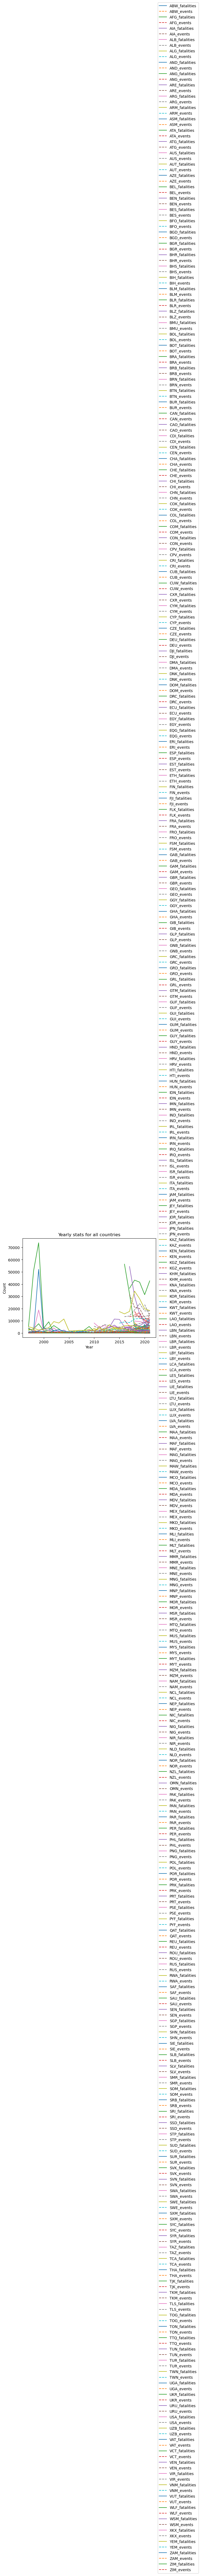

In [31]:

# Create a new figure with two subplots: one for fatalities, one for event types
fig, ax1 = plt.subplots()

# Get unique country IDs
countries = grouped_df['country_id'].unique()

# For each country
for country in countries:
    # Filter the dataframe for the current country
    country_df = grouped_df[grouped_df['country_id'] == country]

    # Plot total fatalities
    ax1.plot(country_df['year'], country_df['Total_Fatalities'], label=f'{country}_fatalities')

    # Plot total event types on the same axes
    ax1.plot(country_df['year'], country_df['Total_Event_Types'], label=f'{country}_events', linestyle='--')

# Add a legend
ax1.legend()

# Label x-axis
ax1.set_xlabel('Year')

# Label y-axis
ax1.set_ylabel('Count')
# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add a title
plt.title('Yearly stats for all countries')

# Save the figure before showing it
plt.savefig('fatalities_events_worldwide_yoy.png', dpi=300, bbox_inches='tight')
plt.show()


In [20]:
# Create a subset of df_grouped that only includes years from 1997 to 2000
subset = grouped_df[(grouped_df['year'] >= 1997) & (grouped_df['year'] <= 2000)]

# Group the data by country and sum the total event types and fatalities for each country
country_totals = subset.groupby('country_id')[['Total_Event_Types', 'Total_Fatalities']].sum()

# Find the top 10 countries for event types and fatalities
top_event_types_countries = country_totals['Total_Event_Types'].nlargest(15)
top_fatalities_countries = country_totals['Total_Fatalities'].nlargest(15)

print("Top 15 countries with the most event types from 1997 to 2000:")
print(top_event_types_countries)
print("\nTop 15 countries with the most fatalities from 1997 to 2000:")
print(top_fatalities_countries)


Top 15 countries with the most event types from 1997 to 2000:
country_id
SIE    4206
ANG    2512
DRC    1247
BUR    1001
SUD     959
UGA     945
KEN     705
NIG     665
ZIM     470
ALG     425
SAF     330
ETH     302
RWA     294
ERI     288
GUI     259
Name: Total_Event_Types, dtype: int64

Top 15 countries with the most fatalities from 1997 to 2000:
country_id
ANG    133926
ERI     53648
ETH     21294
DRC     14959
SUD     14711
BUR     10989
NIG      6895
ALG      6606
RWA      6152
UGA      4629
KEN      1891
GUI      1884
CHA      1032
SEN       851
GNB       810
Name: Total_Fatalities, dtype: int64


/var/folders/dx/ls0lyt353338nw7j4wtl8tk40000gn/T/ipykernel_61867/2534206232.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['event_count'] = 1


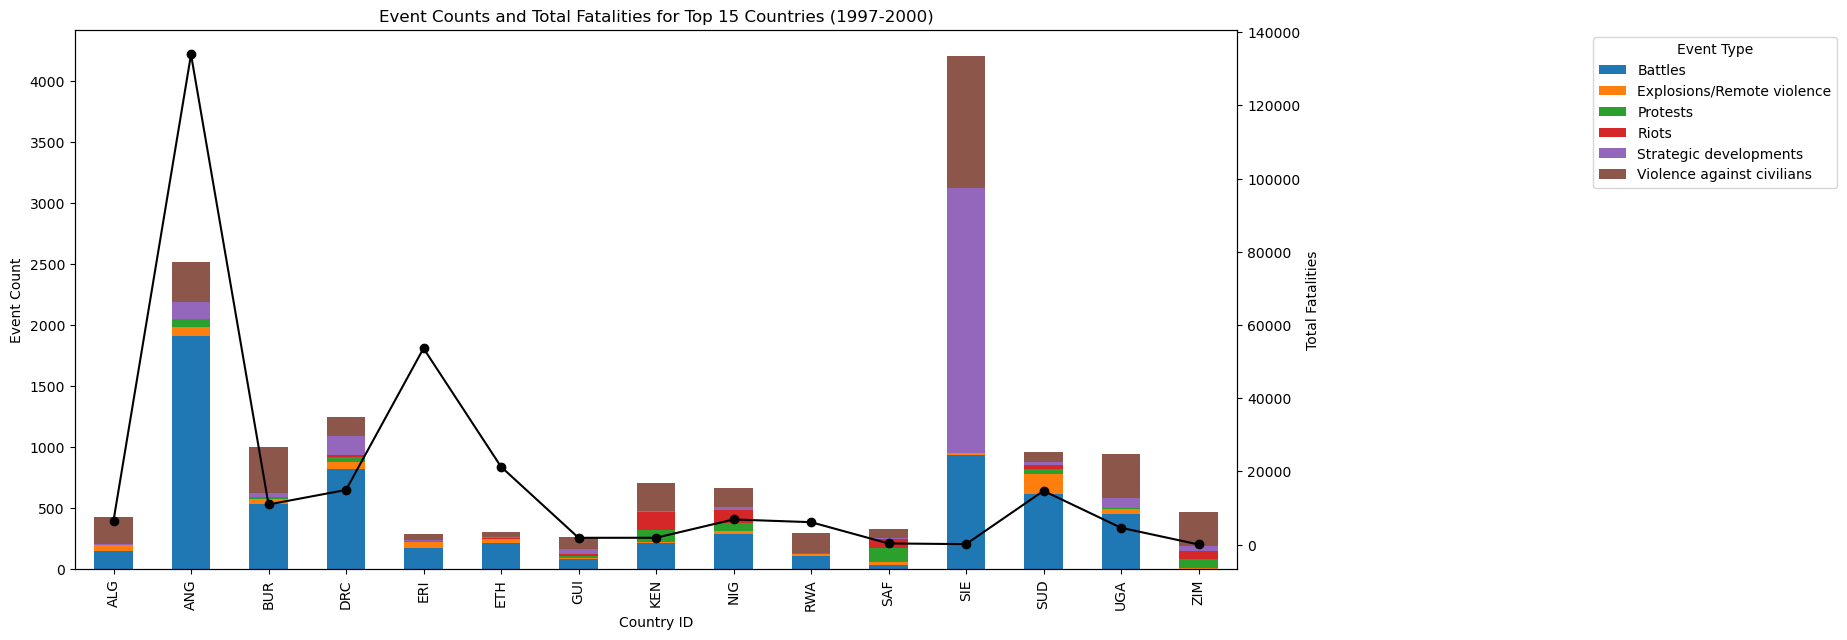

In [32]:
# Create a subset of df_grouped that only includes years from 1997 to 2000
filtered = df_combined[(df_combined['year'] >= 1997) & (df_combined['year'] <= 2000)]

# Create event_count column
filtered['event_count'] = 1

# Filter for top 15 countries
top_15_countries = ['SIE', 'ANG', 'DRC', 'BUR', 'SUD', 'UGA', 'KEN', 'NIG', 'ZIM', 'ALG', 'SAF', 'ETH', 'RWA', 'ERI', 'GUI']
df_top_countries = filtered[filtered['event_id_cnty'].str[:3].isin(top_15_countries)]

# Pivot table to get event count for each event type for each country
event_type_count = pd.pivot_table(df_top_countries, values='event_count', index=df_top_countries['event_id_cnty'].str[:3], columns='event_type', aggfunc='sum', fill_value=0)

# Calculate total fatalities for each country
total_fatalities = df_top_countries.groupby(df_top_countries['event_id_cnty'].str[:3])['fatalities'].sum()

fig, ax1 = plt.subplots(figsize=(15,7))

# Plot event counts
event_type_count.plot(kind='bar', stacked=True, ax=ax1)

# Set labels and title
ax1.set_title('Event Counts and Total Fatalities for Top 15 Countries (1997-2000)')
ax1.set_xlabel('Country ID')
ax1.set_ylabel('Event Count')
ax1.legend(title='Event Type', bbox_to_anchor=(1.3,1), loc="upper left")  # Moves the legend outside of the plot

# Create a secondary y-axis
ax2 = ax1.twinx()
total_fatalities.plot(kind='line', marker='o', ax=ax2, color='black')

# Set labels for the secondary y-axis
ax2.set_ylabel('Total Fatalities')

# Save the figure before showing it
plt.savefig('1997to2000_top_countries.png', dpi=300, bbox_inches='tight')

plt.show()



In [29]:
# Create a subset of df_grouped that only includes years from 2016 to 2021
subset2 = grouped_df[(grouped_df['year'] >= 2016) & (grouped_df['year'] <= 2021)]

# Group the data by country and sum the total event types and fatalities for each country
country_totals = subset2.groupby('country_id')[['Total_Event_Types', 'Total_Fatalities']].sum()

# Find the top 10 countries for event types and fatalities
top_event_types_countries = country_totals['Total_Event_Types'].nlargest(15)
top_fatalities_countries = country_totals['Total_Fatalities'].nlargest(15)

print("Top 15 countries with the most event types from 2016 to 2021:")
print(top_event_types_countries)
print("\nTop 15 countries with the most fatalities from 2016 to 2021:")
print(top_fatalities_countries)


Top 15 countries with the most event types from 2016 to 2021:
country_id
IND    106205
SYR     95515
YEM     61726
AFG     61509
MEX     54688
BRA     53132
UKR     50281
PAK     40184
USA     37293
IRQ     36130
MMR     22891
TUR     22789
PSE     22696
KOR     20543
SOM     17475
Name: Total_Event_Types, dtype: int64

Top 15 countries with the most fatalities from 2016 to 2021:
country_id
AFG    195503
YEM    133797
SYR    114142
IRQ    101698
NIG     41315
MEX     35741
SOM     29344
DRC     24225
BRA     23598
ETH     19233
SSD     16599
MMR     15488
PHL     15358
TUR     11808
LBY     10236
Name: Total_Fatalities, dtype: int64


/var/folders/dx/ls0lyt353338nw7j4wtl8tk40000gn/T/ipykernel_61867/2919666874.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered2['event_count'] = 1


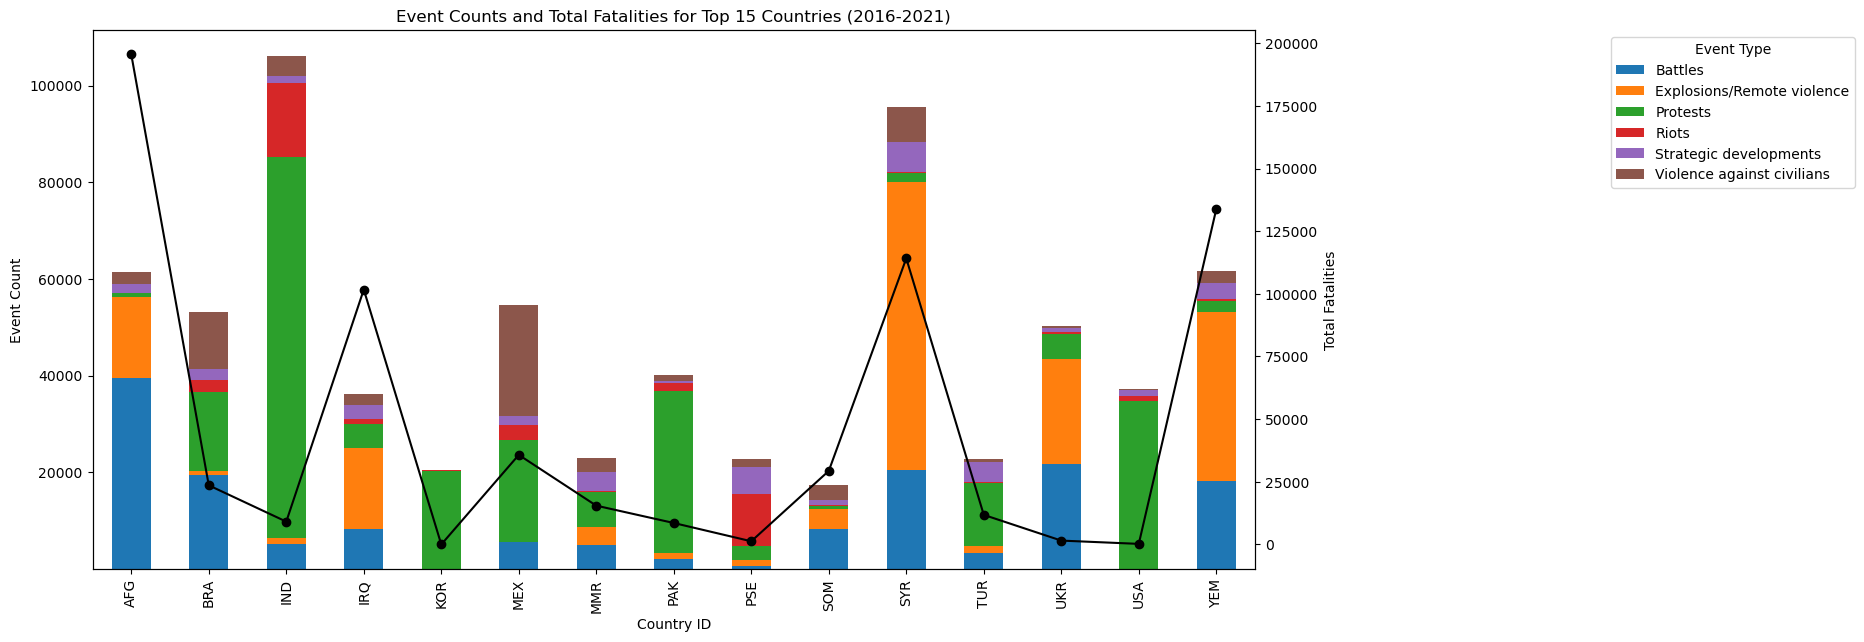

In [33]:
# Create a subset of df_grouped that only includes years from 2016 to 2021
filtered2 = df_combined[(df_combined['year'] >= 2016) & (df_combined['year'] <= 2021)]

# Create event_count column
filtered2['event_count'] = 1

# Filter for top 15 countries
top_15_countries = ['IND', 'SYR', 'YEM', 'AFG', 'MEX', 'BRA', 'UKR', 'PAK', 'USA', 'IRQ', 'MMR', 'TUR', 'PSE', 'KOR', 'SOM']
df_top_countries = filtered2[filtered2['event_id_cnty'].str[:3].isin(top_15_countries)]

# Pivot table to get event count for each event type for each country
event_type_count = pd.pivot_table(df_top_countries, values='event_count', index=df_top_countries['event_id_cnty'].str[:3], columns='event_type', aggfunc='sum', fill_value=0)

# Calculate total fatalities for each country
total_fatalities = df_top_countries.groupby(df_top_countries['event_id_cnty'].str[:3])['fatalities'].sum()

fig, ax1 = plt.subplots(figsize=(15,7))

# Plot event counts
event_type_count.plot(kind='bar', stacked=True, ax=ax1)

# Set labels and title
ax1.set_title('Event Counts and Total Fatalities for Top 15 Countries (2016-2021)')
ax1.set_xlabel('Country ID')
ax1.set_ylabel('Event Count')
ax1.legend(title='Event Type', bbox_to_anchor=(1.3,1), loc="upper left")  # Moves the legend outside of the plot

# Create a secondary y-axis
ax2 = ax1.twinx()
total_fatalities.plot(kind='line', marker='o', ax=ax2, color='black')

# Set labels for the secondary y-axis
ax2.set_ylabel('Total Fatalities')
# Save the figure before showing it
plt.savefig('2016to2021_top_countries.png', dpi=300, bbox_inches='tight')

plt.show()
